# Assignment 02
**MIN E 295**  
Help Session

Harold Velasquez  hvelasquez@ualberta.ca  
Norris Amihere   namihere@ualberta.ca

University of Alberta  

## **Question 1**

**a) Draw the sampling locations using a computer program or simply by hand on a paper**

The inverse distance weighting estimation formula is given as follows:  
  
$z^{*}\left(\mathbf{u}_{0}\right)=\frac{\sum_{i=1}^{n} w\left(\mathbf{u}_{i}\right) z\left(\mathbf{u}_{i}\right)}{\sum_{i=1}^{n} w\left(\mathbf{u}_{i}\right)}$


Where $z^{*}(u_{o})$ is the estimate assigned to the unknown location; $𝑧(u_{i})$ is the 𝑖th sample of the variable and $w(u_{i`})$ is the weight assigned to each available sample $z(u_{i})$. The weight $w(u_{i})$ is calculated by the following formula:  
  
  $w\left(\mathbf{u}_{i}\right)=\frac{1}{d_{i}^{p}}$


Where $d_{i}$  is the Euclidean distance between the sample and the location being estimated and the exponent 𝑝 is the parameter controlling the degree to which the nearer samples are preferredover more distant samples. Table contains four spatial (with coordinates easting and northing) samples and the location where an estimate for a measurement of interest is needed.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
data = [[8,15,38], [25,170,120], [260,119,88], [100,80,160], [180,130,170]]
z    = [180,120]
columns = ['X','Y','value']

df = pd.DataFrame(data, columns=columns)
df

,X,Y,value
0,8,15,38
1,25,170,120
2,260,119,88
3,100,80,160
4,180,130,170


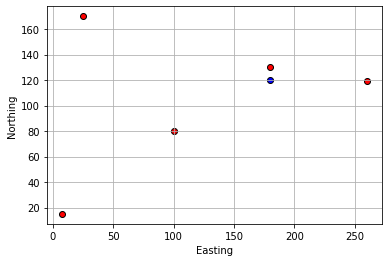

In [18]:
plt.scatter(df['X'], df['Y'], c='r', edgecolor='k')
plt.scatter(z[0], z[1], c='b', edgecolor='k')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid()

**b) Assign an estimate to the unknown location using the inverse distance weighting estimation method.** 


In [19]:
df['Distance'] = ((df['X']-z[0])**2 + (df['Y'] - z[1])**2) **0.5
df

,X,Y,value,Distance
0,8,15,38,201.516749
1,25,170,120,162.864975
2,260,119,88,80.006250
3,100,80,160,89.442719
4,180,130,170,10.000000


Weight assigned to each measurement is inversely proportional to the distance to the power of a parameter $p$  
$w\left(\mathbf{u}_{i}\right)=\frac{1}{d_{i}^{p}}$

In [20]:
df['Weight'] = (df['Distance']**(-1))**3
df

,X,Y,value,Distance,Weight
0,8,15,38,201.516749,1.221987e-07
1,25,170,120,162.864975,2.314818e-07
2,260,119,88,80.006250,1.952667e-06
3,100,80,160,89.442719,1.397542e-06
4,180,130,170,10.000000,1.000000e-03


In [21]:
df['Weight*value'] = df['Weight'] * df['value']
df

,X,Y,value,Distance,Weight,Weight*value
0,8,15,38,201.516749,1.221987e-07,0.000005
1,25,170,120,162.864975,2.314818e-07,0.000028
2,260,119,88,80.006250,1.952667e-06,0.000172
3,100,80,160,89.442719,1.397542e-06,0.000224
4,180,130,170,10.000000,1.000000e-03,0.170000


In [22]:
estimate = df['Weight*value'].sum() / df['Weight'].sum()
print('Estimated value with IDW:', round(estimate,3))

Estimated value with IDW: 169.799


## **Question 2**

 A mine’s expected gold price is 1900 USD/ozt and silver price of 25 USD/ozt. The
conversion rate from CAD to USD is expected to be 1.33 CAD/USD. Recall that precious metal
prices are expressed per troy ounce (ozt) not regular ounce. The anticipated mining operation will
cost 60 CAD/t of ore to mine and 45 CAD/t of ore to process. Recovery of gold and silver will be
0.9 and 0.8, respectively. 


**a) Calculate a factor to convert the silver grade to an equivalent gold grade**


In [23]:
price_au = 1780           # USD/ozt
price_ag = 22.68             # USD/ozt
currency_exchange = 1.30  # CAD/USD

mining_cost = 50          # CAD/t
processing_cost = 40      # CAD/t

recovery_au = 0.88
recovery_ag = 0.70

In [24]:
price_au_cad    = price_au * currency_exchange   # CAT/ozt
price_au_cad_gr = price_au_cad / 31.1035         # CAD/gr
recovered_au    = price_au_cad_gr * recovery_au  # CAD/gr

price_ag_cad    = price_ag * currency_exchange   # CAT/ozt
price_ag_cad_gr = price_ag_cad / 31.1035         # CAD/gr
recovered_ag    = price_au_cad_gr * recovery_ag  # CAD/gr

print('Gold price CAD/g:' , price_au_cad_gr)
print('Gold recovered CAD/g:',recovered_au,'\n')

print('Silver price in CAD/g:' , price_ag_cad_gr)
print('Gold recovered CAD/g:',recovered_ag)

Gold price CAD/g: 74.39677206745222
Gold recovered CAD/g: 65.46915941935795 

Silver price in CAD/g: 0.9479319047695598
Gold recovered CAD/g: 52.07774044721655


The equivalent value of Silver with respect to Au is the ratio. Here the recovery is also considered.

In [25]:
factor = (price_ag_cad*recovery_ag) / (price_au_cad * recovery_au)
print('Conversion Factor:', round(factor,4))

Conversion Factor: 0.0101


**b) Calculate the cutoff grade in units of g/t for gold**


In [26]:
total_cost = mining_cost + processing_cost

cutoff_au = total_cost / recovered_au
print('Cutoff for Gold:',round(cutoff_au,2),'g/t')

Cutoff for Gold: 1.37 g/t


## **Question 3**

You are considering a small gold/silver vein with 10 drill holes (plane of vein sketch in Figure 2) using the information in question 4. Assays and ore thickness perpendicular to the plane of vein are included in Table 2. The average specific gravity of the deposit is 2.9. The mineralized region is indicated by the red dashed line, but drill holes inside may not be profitable to process. 

**a) Calculate the gold equivalent grade for each drill hole.**

In [27]:
dh_data = [[1,1.2,1.2,38],[2,1.6,2.3,47],[3,0,0,18],
        [4,2.1,10,150],[5,2.7,11,211.5],[6,0,0,25],
        [7,1.2,9,155],[6,1.6,4.8,50],[9,2.6,8.4,160],[10,1.5,1.8,17]]

columns = ['DDH','Thickness','au','ag']
dh = pd.DataFrame(dh_data, columns=columns)
dh

,DDH,Thickness,au,ag
0,1,1.2,1.2,38.0
1,2,1.6,2.3,47.0
2,3,0.0,0.0,18.0
3,4,2.1,10.0,150.0
4,5,2.7,11.0,211.5
5,6,0.0,0.0,25.0
6,7,1.2,9.0,155.0
7,6,1.6,4.8,50.0
8,9,2.6,8.4,160.0
9,10,1.5,1.8,17.0


Equivalent Au consider the scaled contribution of Ag

In [28]:
dh['au_equiv'] = dh['au'] +  dh['ag'] * factor
dh

,DDH,Thickness,au,ag,au_equiv
0,1,1.2,1.2,38.0,1.585143
1,2,1.6,2.3,47.0,2.776361
2,3,0.0,0.0,18.0,0.182436
3,4,2.1,10.0,150.0,11.520301
4,5,2.7,11.0,211.5,13.143625
5,6,0.0,0.0,25.0,0.253384
6,7,1.2,9.0,155.0,10.570978
7,6,1.6,4.8,50.0,5.306767
8,9,2.6,8.4,160.0,10.021655
9,10,1.5,1.8,17.0,1.972301


**b) Using the cutoff grade calculated in question 4, estimate the tonnes of ore contained in this deposit. Based on the plane of vein sketch, you could assume an area of influence of 800 m2  per drill hole**

In [29]:
area_dh = 500  # Assumption
density = 3.3

dh['tonnage'] = dh['Thickness'] * area_dh * density
tonnage = dh['tonnage'].sum()

print(dh)
print('Tonnage (tons):', tonnage)

   DDH  Thickness    au     ag   au_equiv  tonnage
0    1        1.2   1.2   38.0   1.585143   1980.0
1    2        1.6   2.3   47.0   2.776361   2640.0
2    3        0.0   0.0   18.0   0.182436      0.0
3    4        2.1  10.0  150.0  11.520301   3465.0
4    5        2.7  11.0  211.5  13.143625   4455.0
5    6        0.0   0.0   25.0   0.253384      0.0
6    7        1.2   9.0  155.0  10.570978   1980.0
7    6        1.6   4.8   50.0   5.306767   2640.0
8    9        2.6   8.4  160.0  10.021655   4290.0
9   10        1.5   1.8   17.0   1.972301   2475.0
Tonnage (tons): 23925.0


**c) Calculate the gross and net value of the ore. Discuss uncertainty and sensitivity.**


In [30]:
dh['au_content_gr'] = dh['tonnage'] * dh['au'] * recovery_au
dh['ag_content_gr'] = dh['tonnage'] * dh['ag'] * recovery_ag

mining_cost_total = tonnage * total_cost / 1.33

gross_revenue_au = dh['au_content_gr'].sum() / 31.1035 * price_au
gross_revenue_ag = dh['ag_content_gr'].sum() / 31.1035 * price_ag

gross_revenue = gross_revenue_au + gross_revenue_ag

net_revenue = gross_revenue - mining_cost_total

print('Total mining cost:',round(mining_cost_total,3),'$USD')
print('Gross Revenue',round(gross_revenue,3), '$USD')
print('Net Revenue',round(net_revenue,3), '$USD')

Total mining cost: 1618984.962 $USD
Gross Revenue 9656983.76 $USD
Net Revenue 8037998.798 $USD
